In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [41]:
insurance = pd.read_csv('insurance.csv') 

In [42]:
insurance.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [43]:
insurance.shape

(1338, 7)

In [44]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [45]:
insurance.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [46]:
print(insurance.sex.value_counts())
print(insurance.smoker.value_counts())
print(insurance.region.value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [47]:
insurance.replace({'sex':{'male':0,'female':1}})

age  sex     bmi  children smoker     region      charges
0      19    1  27.900         0    yes  southwest  16884.92400
1      18    0  33.770         1     no  southeast   1725.55230
2      28    0  33.000         3     no  southeast   4449.46200
3      33    0  22.705         0     no  northwest  21984.47061
4      32    0  28.880         0     no  northwest   3866.85520
...   ...  ...     ...       ...    ...        ...          ...
1333   50    0  30.970         3     no  northwest  10600.54830
1334   18    1  31.920         0     no  northeast   2205.98080
1335   18    1  36.850         0     no  southeast   1629.83350
1336   21    1  25.800         0     no  southwest   2007.94500
1337   61    1  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

Categorical Features:

    sex
    Smoker
    Region

In [48]:
insurance.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

/var/folders/6s/kxz9jf_11yx21882_h5nl_q40000gn/T/ipykernel_5119/2350412657.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['age'])


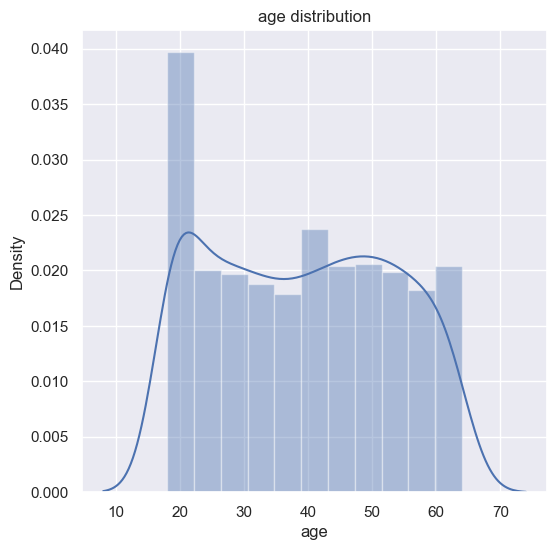

In [49]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance['age'])
plt.title('age distribution')
plt.show()

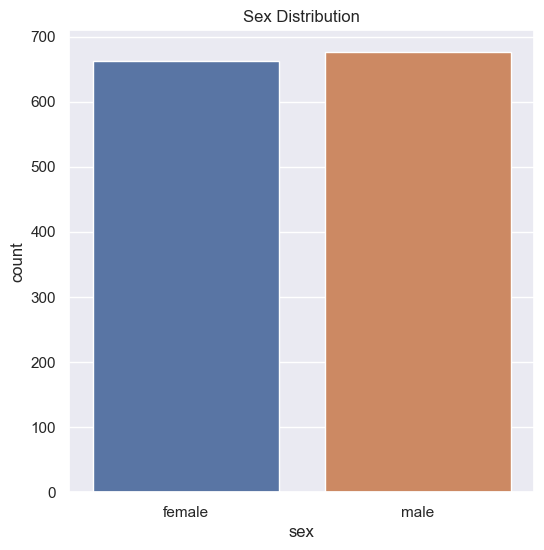

In [50]:
# Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance)
plt.title("Sex Distribution")
plt.show()

/var/folders/6s/kxz9jf_11yx21882_h5nl_q40000gn/T/ipykernel_5119/900372383.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['bmi'])


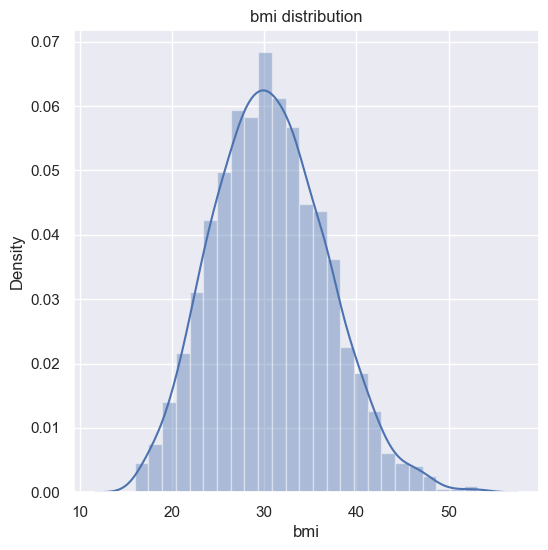

In [51]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance['bmi'])
plt.title('bmi distribution')
plt.show()

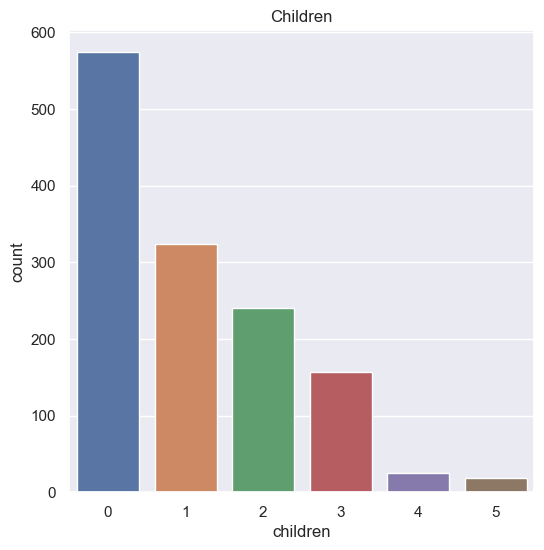

In [52]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance)
plt.title('Children')
plt.show()

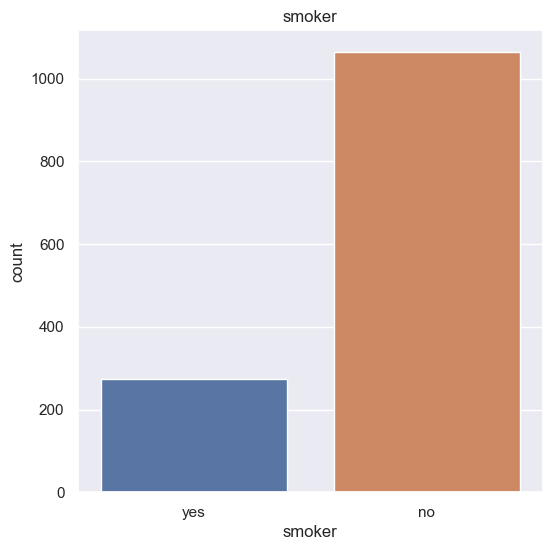

In [53]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance)
plt.title('smoker')
plt.show()

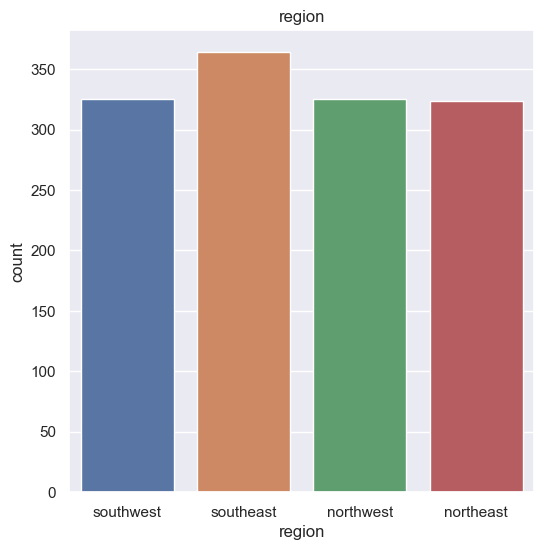

In [54]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance)
plt.title('region')
plt.show()

/var/folders/6s/kxz9jf_11yx21882_h5nl_q40000gn/T/ipykernel_5119/788861167.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['charges'])


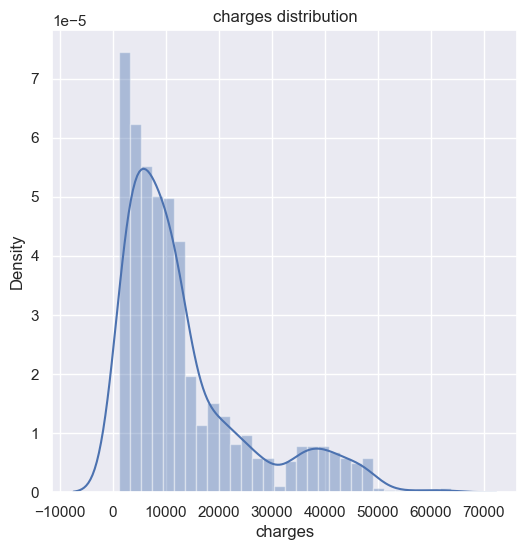

In [55]:
# charges distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance['charges'])
plt.title('charges distribution')
plt.show()

In [56]:
# encoding the sex column
insurance.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding the smoker column
insurance.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding the region column
insurance.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)


In [57]:
insurance

age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       1  16884.92400
1      18    0  33.770         1       1       0   1725.55230
2      28    0  33.000         3       1       0   4449.46200
3      33    0  22.705         0       1       3  21984.47061
4      32    0  28.880         0       1       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       3  10600.54830
1334   18    1  31.920         0       1       2   2205.98080
1335   18    1  36.850         0       1       0   1629.83350
1336   21    1  25.800         0       1       1   2007.94500
1337   61    1  29.070         0       0       3  29141.36030

[1338 rows x 7 columns]

Splitting the Features and Target

In [58]:
X = insurance.drop(columns='charges', axis=1)
Y = insurance['charges']

In [59]:
X

age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]

In [60]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Splitting the Data into Training and Testing data

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [62]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [63]:
regressor = LinearRegression()

In [64]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [65]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [66]:
# r2 value
error_value = metrics.r2_score(Y_train, training_data_prediction)

In [67]:
error_value

0.751505643411174

In [68]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [69]:
# r2 value
error_value = metrics.r2_score(Y_test, test_data_prediction)
error_value

0.7447273869684077

Building a Predictive System

In [75]:
input_data = (31,1,25.74,0,1,0) # from the data only

#changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
# to let the model know that we only want value for 1 particular input
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshape)
print(prediction)
# and the actual value was 3756.6216, which is very close to the original value, so our model is working well

[3760.0805765]


/Users/manavgora/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
